In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import spacy
import nltk

In [53]:
 data1= '/content/drive/MyDrive/Colab Notebooks/Udemy_Natural_Language_Processing_NLP_in_Python_with_8_Projects_2021-11/project_3/data3.TXT'
 data2 = '/content/drive/MyDrive/Colab Notebooks/Udemy_Natural_Language_Processing_NLP_in_Python_with_8_Projects_2021-11/project_3/data3.TXT'
 data3 = '/content/drive/MyDrive/Colab Notebooks/Udemy_Natural_Language_Processing_NLP_in_Python_with_8_Projects_2021-11/project_3/data3.TXT'
 data_yelp = pd.read_csv(data1 , sep="\t",header=None)
 data_yelp

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [54]:
data_yelp.head()

,0,1
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [55]:
data_yelp.isna().sum()

0    0
1    0
dtype: int64

In [56]:
data_yelp[1].value_counts()

0    500
1    500
Name: 1, dtype: int64

In [57]:
column_name = ["Review","Sentiment"]
data_yelp.columns = column_name

In [58]:
data_yelp.columns

Index(['Review', 'Sentiment'], dtype='object')

In [59]:
data_IMBD = pd.read_csv(data2 , sep="\t",header=None)
data_amazon = pd.read_csv(data3 , sep="\t",header=None)

In [60]:
data_IMBD[1].value_counts() , data_amazon[1].value_counts()

(0    500
 1    500
 Name: 1, dtype: int64,
 0    500
 1    500
 Name: 1, dtype: int64)

In [61]:
x = data_yelp["Review"]
y = data_yelp["Sentiment"]
x,y

(0      So there is no way for me to plug it in here i...
 1                            Good case, Excellent value.
 2                                 Great for the jawbone.
 3      Tied to charger for conversations lasting more...
 4                                      The mic is great.
                              ...                        
 995    The screen does get smudged easily because it ...
 996    What a piece of junk.. I lose more calls on th...
 997                         Item Does Not Match Picture.
 998    The only thing that disappoint me is the infra...
 999    You can not answer calls with the unit, never ...
 Name: Review, Length: 1000, dtype: object,
 0      0
 1      1
 2      1
 3      0
 4      1
       ..
 995    0
 996    0
 997    0
 998    0
 999    0
 Name: Sentiment, Length: 1000, dtype: int64)

# **Data Cleaning**

In [62]:
import string

In [63]:
punct = string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [64]:
from spacy.lang.en.stop_words import STOP_WORDS

In [65]:
stopword = list(STOP_WORDS)

In [66]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [67]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [68]:
def text_data_cleaning(sentence):
  doc = nlp(sentence)
  tokens = []
  for token in doc:
    if token.lemma_ != "-PRON-":
      temp = token.lemma_.lower().strip()
    else:
      temp = token.lower_
    tokens.append(temp)

  cleaned_tokens = []
  for token in tokens:
    if token not in stopword and token not in punct:
      cleaned_tokens.append(token)
  return cleaned_tokens


In [69]:
text_data_cleaning("HEllo all , it's a good day to die!")

['hello', 'good', 'day', 'die']

# Vectorization Feature Engineering (TF-IDF)

In [70]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [71]:
tf_idf = TfidfVectorizer(tokenizer=text_data_cleaning)
model = LinearSVC()

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.22)

In [75]:
clf = Pipeline([('tfidf',tf_idf),('clf',model)])

In [77]:
clf.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function text_data_cleaning at 0x791ea6027760>)),
                ('clf', LinearSVC())])

In [78]:
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , ConfusionMatrixDisplay , confusion_matrix , classification_report

In [80]:
y_pred = clf.predict(x_test)

In [82]:
accuracy_score(y_test , y_pred) *100 , precision_score(y_test , y_pred)*100 , recall_score(y_test , y_pred)*100 , f1_score(y_test , y_pred)*100

(73.18181818181819, 69.0909090909091, 75.24752475247524, 72.03791469194313)

In [84]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       119
           1       0.69      0.75      0.72       101

    accuracy                           0.73       220
   macro avg       0.73      0.73      0.73       220
weighted avg       0.74      0.73      0.73       220



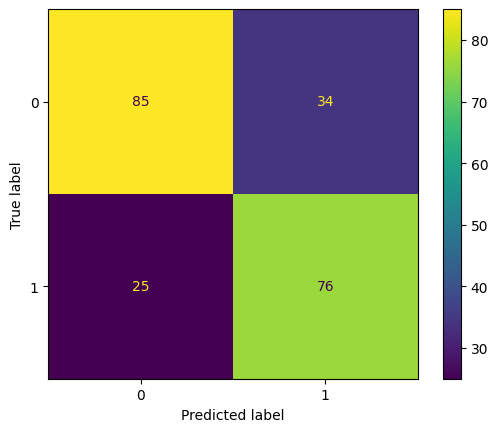

In [94]:
%matplotlib inline
ConfusionMatrixDisplay(confusion_matrix(y_test , y_pred)).plot()

In [98]:
clf.predict(["The BMW M3 GT3 is a true testament to precision engineering and unparalleled performance. From its sleek exterior design to its finely tuned mechanics, every aspect of this machine exudes excellence."])
# 0 -> bad review , 1-> good review

array([0])